### Target Analysis

    Winning The Toss and winning the match is directly proportionate - Done
    Which team has won the toss and choose to bat first most number of times
    Analysis of teams winning choosing to field first
    highest winning percentage  of which team at home ground or particular venue
    Player with most MOTM
    In the result of the matches are completely independent of the umpires, or there are umpires for whomever some particular team has won unnaturally high or low
    ratio of DL method applied and not applied
    Ratio of matches being played on a particular season

In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [34]:
ipl = pd.read_csv("matches.csv")
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [35]:
# team name update -

team_name_updates = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Pune Warriors': 'Rising Pune Supergiants',  # Assuming Pune Warriors should be merged into Rising Pune Supergiants
    'Sunrisers Hyderabad': 'Deccan Chargers',
    'Delhi Capitals': 'Delhi Daredevils'
}

ipl['team1'] = ipl['team1'].replace(team_name_updates)
ipl['team2'] = ipl['team2'].replace(team_name_updates)
ipl['toss_winner'] = ipl['toss_winner'].replace(team_name_updates)
ipl['winner'] = ipl['winner'].replace(team_name_updates)

# Display updated DataFrame
print(ipl['team1'].unique())
print(ipl['team2'].unique())
print(ipl['toss_winner'].unique())
print(ipl['winner'].unique())

['Deccan Chargers' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kochi Tuskers Kerala']
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Deccan Chargers' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Kochi Tuskers Kerala']
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Deccan Chargers'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Kochi Tuskers Kerala']
['Deccan Chargers' 'Rising Pune Supergiants' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Kochi Tuskers Kerala' nan]


### Winning The Toss and winning the match is directly proportionate

In [36]:
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [37]:
ipl3 = ipl[['result','winner']]
ipl3.head()

,result,winner
0,normal,Deccan Chargers
1,normal,Rising Pune Supergiants
2,normal,Kolkata Knight Riders
3,normal,Kings XI Punjab
4,normal,Royal Challengers Bangalore


In [38]:
ipl4 = ipl3[ipl3['result']=='no result']
ipl4.head()

,result,winner
300,no result,NaN
545,no result,NaN
570,no result,NaN
744,no result,NaN


In [39]:
ipl5 = ipl3[ipl3['result']=='tie']
ipl5.head()

,result,winner
33,tie,Mumbai Indians
125,tie,Rajasthan Royals
189,tie,Kings XI Punjab
387,tie,Deccan Chargers
400,tie,Royal Challengers Bangalore


In [40]:
# create a new column indicating the match outcome 
ipl['match_outcome'] = ipl['result'].map({
    'normal': 1,
    'tie':0,
    'no result':-1
})

In [41]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_outcome
0,1,IPL-2017,Hyderabad,05-04-2017,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1


In [42]:
match_df = ipl[['result','match_outcome']]
match_df1 = match_df[match_df['result']=='no result']
match_df1.head()

,result,match_outcome
300,no result,-1
545,no result,-1
570,no result,-1
744,no result,-1


In [43]:
ipl.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_outcome'],
      dtype='object')

In [44]:
ipl['toss_win_match_win'] = ipl.apply(
    lambda row: 1 if row['toss_winner'] == row['winner'] else 0 , axis=1
)

In [45]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_outcome,toss_win_match_win
0,1,IPL-2017,Hyderabad,05-04-2017,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,1
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,1
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,1


In [46]:
correlation = ipl['toss_win_match_win'].corr(ipl['match_outcome'])

In [47]:
correlation

0.05630063413968335

In [48]:
cross_tab = pd.crosstab(ipl['toss_win_match_win'],ipl['match_outcome'])
cross_tab

match_outcome,-1,0,1
toss_win_match_win,,,
0,4,4,355
1,0,5,388


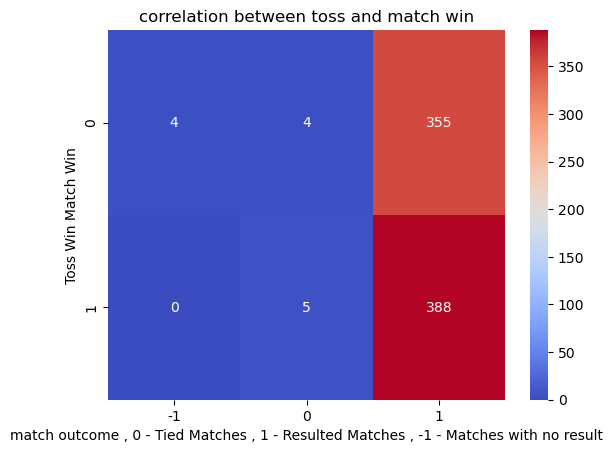

In [49]:
ax = sns.heatmap(cross_tab,annot=True,fmt = "d",cmap = "coolwarm",cbar= True)
plt.title("correlation between toss and match win")
plt.xlabel("match outcome , 0 - Tied Matches , 1 - Resulted Matches , -1 - Matches with no result")
plt.ylabel("Toss Win Match Win")
plt.show()


In [50]:
ipl.to_csv("updated_ipl.csv")

In [51]:
#  winning the matches of the teams based on the grounds they played on

winning_team_data = ipl[['city','winner']]
winning_team_data.head()

,city,winner
0,Hyderabad,Deccan Chargers
1,Pune,Rising Pune Supergiants
2,Rajkot,Kolkata Knight Riders
3,Indore,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore


In [52]:
city_winner_counts = winning_team_data.groupby(['city','winner']).size().reset_index(name='count')
city_winner_counts.head(10)
chennai_winning_matches = ipl[(ipl['winner']=='Chennai Super Kings') & (ipl['city']=='Chennai')]
chennai_playing_matches = ipl[(ipl['team1']=='Chennai Super Kings')|(ipl['team2']=='Chennai Super Kings')]

In [53]:
city_winner_counts_pivot = city_winner_counts.pivot_table(index = 'city', columns='winner',values='count', fill_value=0)

In [54]:
city_winner_counts_pivot

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore
city,,,,,,,,,,,
Abu Dhabi,1,0,0,0,2,0,1,0,3,0,0
Ahmedabad,0,1,1,0,1,0,0,1,7,0,1
Bangalore,4,3,3,1,5,0,6,8,3,1,30
Bengaluru,1,0,1,0,0,0,2,1,1,0,7
Bloemfontein,0,0,1,0,1,0,0,0,0,0,0
Cape Town,0,2,1,0,1,0,0,1,1,0,1
Centurion,2,2,2,0,0,0,1,1,2,0,2
Chandigarh,3,4,1,2,22,0,3,4,3,1,3
Chennai,40,2,2,0,2,0,2,5,1,1,2


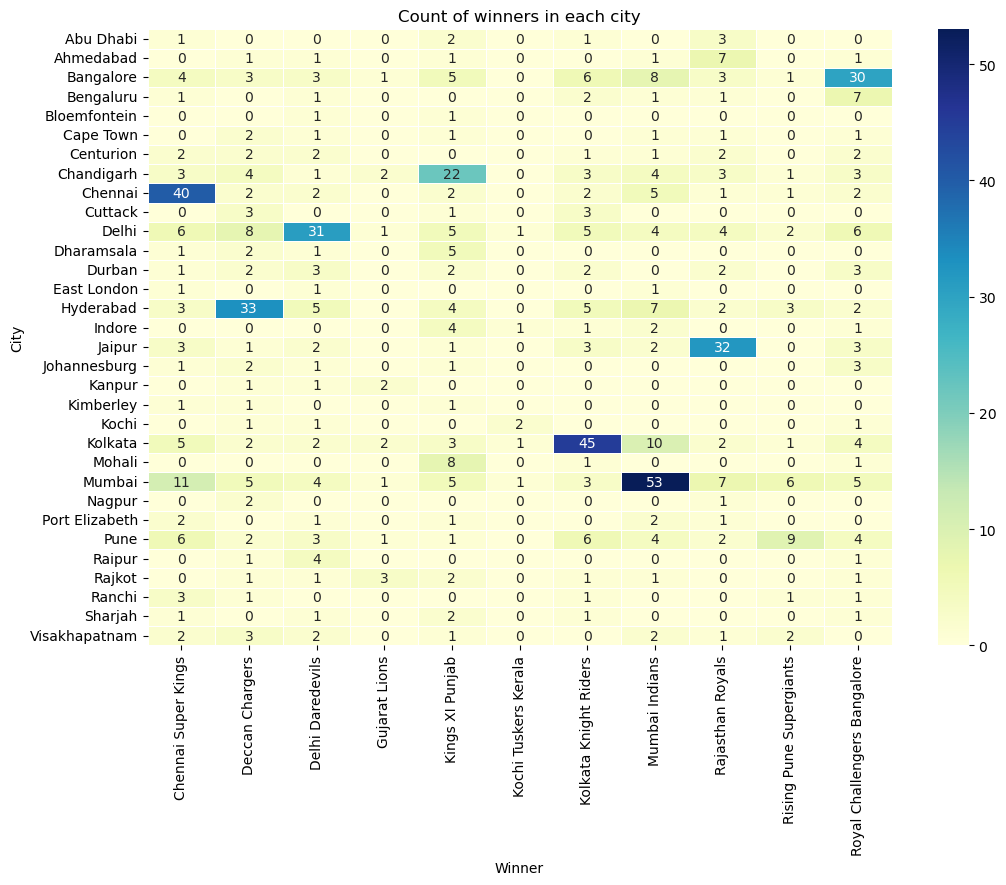

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(city_winner_counts_pivot,cmap='YlGnBu',annot=True,fmt='d',linewidths=0.5)
plt.title('Count of winners in each city')
plt.xlabel('Winner')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()

In [56]:
dl_counts = ipl['dl_applied'].value_counts()
dl_counts.head()

0    737
1     19
Name: dl_applied, dtype: int64

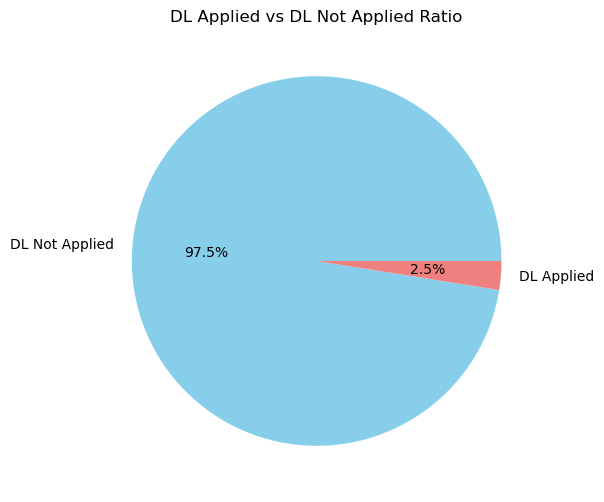

In [57]:
plt.figure(figsize=(6,6))
plt.pie(dl_counts,labels=['DL Not Applied','DL Applied'],autopct="%1.1f%%",colors=['skyblue','lightcoral'])
plt.title('DL Applied vs DL Not Applied Ratio')
plt.show()

In [58]:
ipl['team1'].unique()

array(['Deccan Chargers', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [59]:
#  rising pune supergiants ,rising pune supergiant, pune warriors
#  sunrisers hyderabad and deccan charges
#  Delhi daredevils and Delhi capitals

In [60]:
ipl.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_outcome', 'toss_win_match_win'],
      dtype='object')

In [61]:
for i in ipl.columns:
    print(ipl[i].value_counts())

1        1
509      1
500      1
501      1
502      1
        ..
254      1
255      1
256      1
257      1
11415    1
Name: id, Length: 756, dtype: int64
IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              

In [64]:
ipl['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [67]:
ipl['team1'].unique()

array(['Deccan Chargers', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [68]:
ipl['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Deccan Chargers', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Kochi Tuskers Kerala'],
      dtype=object)

In [70]:
# Create a dictionary mapping cities to home teams
home_team_mapping = {
    'Bangalore': 'Royal Challengers Bangalore',
    'Pune': 'Rising Pune Supergiants',
    'Kolkata': 'Kolkata Knight Riders',
    'Mumbai': 'Mumbai Indians',
    'Chennai': 'Chennai Super Kings',
    'Delhi': 'Delhi Daredevils',
    'Hyderabad': 'Deccan Chargers',
    'Mohali': 'Kings XI Punjab',
    'Chandigarh': 'Kings XI Punjab',
    'Kochi': 'Kochi Tuskers Kerala',
    'Ahmedabad': 'Gujarat Lions',
    'Jaipur': 'Rajasthan Royals'
}

# Create the 'home_team' column
ipl['home_team'] = ipl['city'].map(home_team_mapping)

# For cities with no associated team, fill with "no home team"
ipl['home_team'].fillna('no home team', inplace=True)

# Display the updated DataFrame
ipl[['city', 'home_team']]

,city,home_team
0,Hyderabad,Deccan Chargers
1,Pune,Rising Pune Supergiants
2,Rajkot,no home team
3,Indore,no home team
4,Bangalore,Royal Challengers Bangalore
...,...,...
751,Mumbai,Mumbai Indians
752,Chennai,Chennai Super Kings
753,Visakhapatnam,no home team
754,Visakhapatnam,no home team


In [72]:
# home team winner dataframe
home_winner = ipl[ipl['winner']==ipl['home_team']]
home_winner.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_outcome,toss_win_match_win,home_team
0,1,IPL-2017,Hyderabad,05-04-2017,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,0,Deccan Chargers
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,1,Rising Pune Supergiants
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,1,Royal Challengers Bangalore
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Deccan Chargers,Deccan Chargers,field,normal,0,...,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,1,1,Deccan Chargers
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,1,1,Mumbai Indians


In [73]:
home_winner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 751
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  305 non-null    int64 
 1   Season              305 non-null    object
 2   city                305 non-null    object
 3   date                305 non-null    object
 4   team1               305 non-null    object
 5   team2               305 non-null    object
 6   toss_winner         305 non-null    object
 7   toss_decision       305 non-null    object
 8   result              305 non-null    object
 9   dl_applied          305 non-null    int64 
 10  winner              305 non-null    object
 11  win_by_runs         305 non-null    int64 
 12  win_by_wickets      305 non-null    int64 
 13  player_of_match     305 non-null    object
 14  venue               305 non-null    object
 15  umpire1             304 non-null    object
 16  umpire2             304 no

In [75]:
# Assuming 'ipl' is your DataFrame with the 'home_team' column
# Calculate the number of matches played and won by each team at their home ground
home_team_stats = ipl.groupby(['home_team', 'match_outcome']).size().unstack().fillna(0)

# Calculate the win percentage for each team at their home ground
home_team_stats['win_percentage'] = (home_team_stats[1] / (home_team_stats[1] + home_team_stats[0])) * 100

# Display the result
print(home_team_stats[['win_percentage']])


match_outcome                win_percentage
home_team                                  
Chennai Super Kings               98.245614
Deccan Chargers                   98.437500
Delhi Daredevils                  98.630137
Gujarat Lions                     91.666667
Kings XI Punjab                  100.000000
Kochi Tuskers Kerala             100.000000
Kolkata Knight Riders            100.000000
Mumbai Indians                    99.009901
Rajasthan Royals                 100.000000
Rising Pune Supergiants          100.000000
Royal Challengers Bangalore       98.437500
no home team                      98.101266


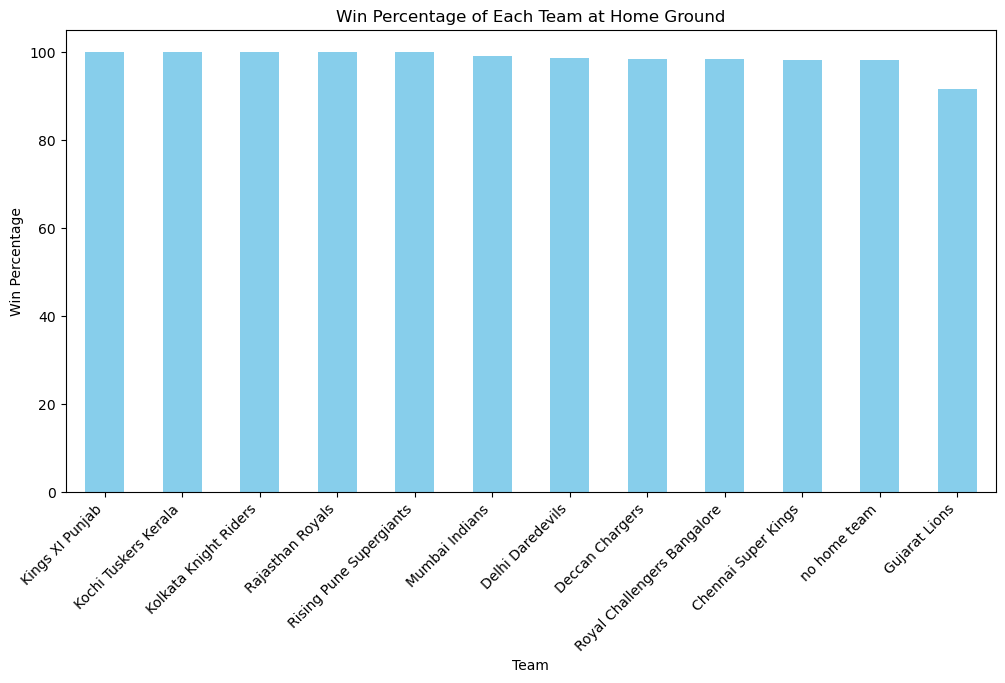

In [76]:
# Assuming 'home_team_stats' is the DataFrame containing win percentages

# Sort the DataFrame by win percentage in descending order
home_team_stats = home_team_stats.sort_values(by='win_percentage', ascending=False)

# Plot the win percentage for each team
plt.figure(figsize=(12, 6))
home_team_stats['win_percentage'].plot(kind='bar', color='skyblue')
plt.title('Win Percentage of Each Team at Home Ground')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\sengu\AppData\Local\Temp\ipykernel_16072\3699854219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_home_matches['is_away_team'] = ~(non_home_matches['team1'] == non_home_matches['home_team']) & ~(non_home_matches['team2'] == non_home_matches['home_team'])


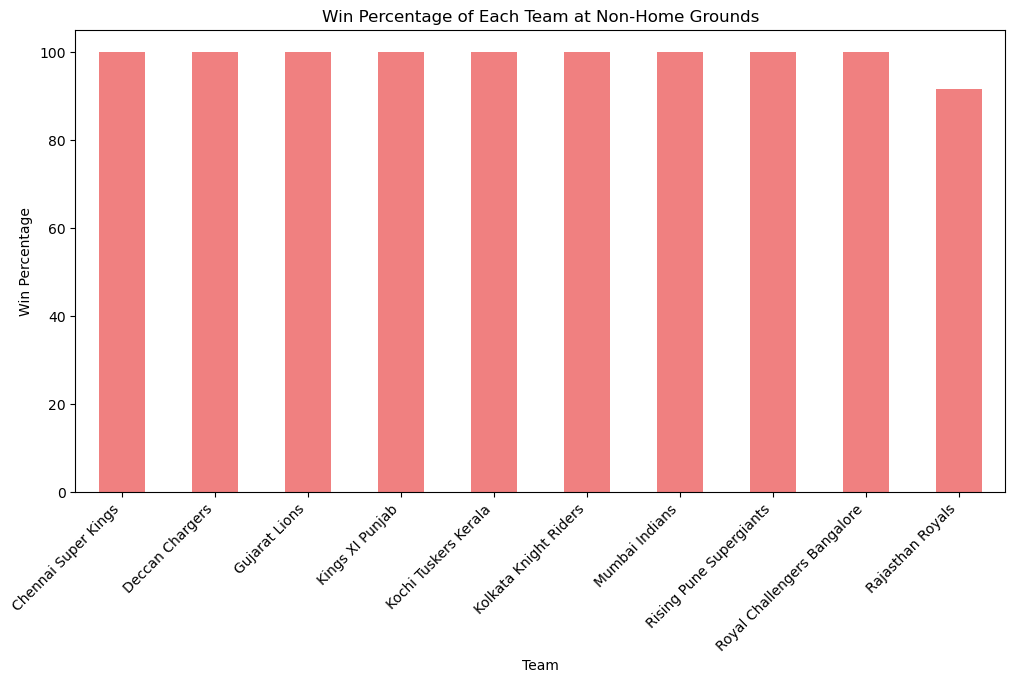

In [78]:
# Assuming 'ipl' is your DataFrame with the 'home_team' column

# Exclude records where home_team is 'no home team'
non_home_matches = ipl[ipl['home_team'] != 'no home team']

# Identify if a team is playing at home or not
non_home_matches['is_away_team'] = ~(non_home_matches['team1'] == non_home_matches['home_team']) & ~(non_home_matches['team2'] == non_home_matches['home_team'])

# Calculate the number of matches played and won by each team at non-home grounds
non_home_team_stats = non_home_matches[non_home_matches['is_away_team']].groupby(['team1', 'match_outcome']).size().unstack().fillna(0)

# Calculate the win percentage for each team at non-home grounds
non_home_team_stats['win_percentage'] = (non_home_team_stats[1] / (non_home_team_stats[1] + non_home_team_stats[0])) * 100

# Sort the DataFrame by win percentage in descending order
non_home_team_stats = non_home_team_stats.sort_values(by='win_percentage', ascending=False)

# Plot the win percentage for each team at non-home grounds
plt.figure(figsize=(12, 6))
non_home_team_stats['win_percentage'].plot(kind='bar', color='lightcoral')
plt.title('Win Percentage of Each Team at Non-Home Grounds')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()
